In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#0: carico il dataset
covid = pd.read_csv("Downloads/owid-covid-data.csv")

#1: visulaizzo le dimensioni del datase e i metadati
print("Dimensioni del dataset:", covid.shape) 
print("\nNomi delle colonne nel dataset:")
print(covid.columns) 
print("\nPrime 5 righe del dataset:")
covid.head()

Dimensioni del dataset: (429435, 67)

Nomi delle colonne nel dataset:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_booste

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [34]:
#2: creo filtro per continente escludendo i valori nulli per poi contare quanti casi per gruppo
pd.set_option('display.float_format', '{:.0f}'.format)
dati_filtrati_continente = covid.query('continent == continent')
casi_totali_per_continente = dati_filtrati_continente.groupby('continent')['total_cases'].sum()
print ('I casi per continente sono i seguenti:')
casi_totali_per_continente

I casi per continente sono i seguenti:


continent
Africa           14616886098
Asia            252167317226
Europe          236756684151
North America   127073670231
Oceania          11598053992
South America    73484570403
Name: total_cases, dtype: float64

In [47]:
#3: sommo i casi totali e creo tre variabili continente contenenti le varie voci statistiche che poi verranno visualizzate su un data frame 
total_cases_world = covid['total_cases'].sum()

continent1 = 'Europe'
continent2 = 'Asia'
continent3 = 'North America'

covid_continent1 = covid[covid['continent'] == continent1]
covid_continent2 = covid[covid['continent'] == continent2]
covid_continent3 = covid[covid['continent'] == continent3]

desc_continent1 = covid_continent1['total_cases'].describe()
desc_continent2 = covid_continent2['total_cases'].describe()
desc_continent3 = covid_continent3['total_cases'].describe()

total_cases_continent1 = covid_continent1['total_cases'].sum()
total_cases_continent2 = covid_continent2['total_cases'].sum()
total_cases_continent3 = covid_continent3['total_cases'].sum()

percentage_continent1 = (total_cases_continent1 / total_cases_world) * 100 if total_cases_world > 0 else 0
percentage_continent2 = (total_cases_continent2 / total_cases_world) * 100 if total_cases_world > 0 else 0
percentage_continent3 = (total_cases_continent3 / total_cases_world) * 100 if total_cases_world > 0 else 0


stats_df = pd.DataFrame({
    'Continent': [continent1, continent2, continent3],
    'Max Cases': [desc_continent1['max'], desc_continent2['max'], desc_continent3['max']],
    'Mean Cases': [desc_continent1['mean'], desc_continent2['mean'], desc_continent3['mean']],
    'Min Cases': [desc_continent1['min'], desc_continent2['min'], desc_continent3['min']],
    '25% Quantile': [desc_continent1['25%'], desc_continent2['25%'], desc_continent3['25%']],
    '50% Quantile': [desc_continent1['50%'], desc_continent2['50%'], desc_continent3['50%']],
    '75% Quantile': [desc_continent1['75%'], desc_continent2['75%'], desc_continent3['75%']],
    'Total Cases': [total_cases_continent1, total_cases_continent2, total_cases_continent3],
    'Percentage of Total World Cases (%)': [percentage_continent1, percentage_continent2, percentage_continent3]
})
stats_df.set_index('Continent', inplace=True)
stats_df

,Max Cases,Mean Cases,Min Cases,25% Quantile,50% Quantile,75% Quantile,Total Cases,Percentage of Total World Cases (%)
Continent,,,,,,,,
Europe,38997490.00,2773170.80,0.00,23291.00,345111.50,1988052.00,236756684151.00,7.81
Asia,99373219.00,3205055.00,0.00,23421.00,343619.50,1420909.00,252167317226.00,8.31
North America,103436829.00,1851468.23,0.00,2478.00,13027.00,153585.00,127073670231.00,4.19


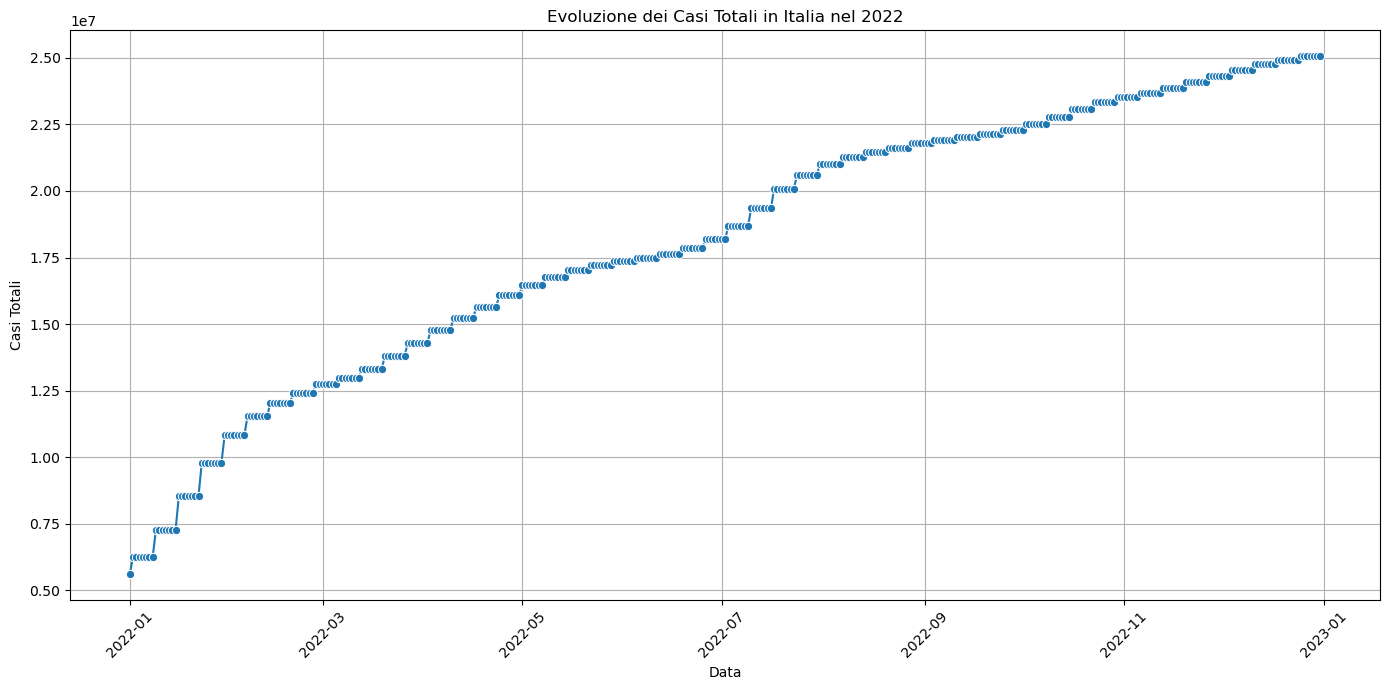

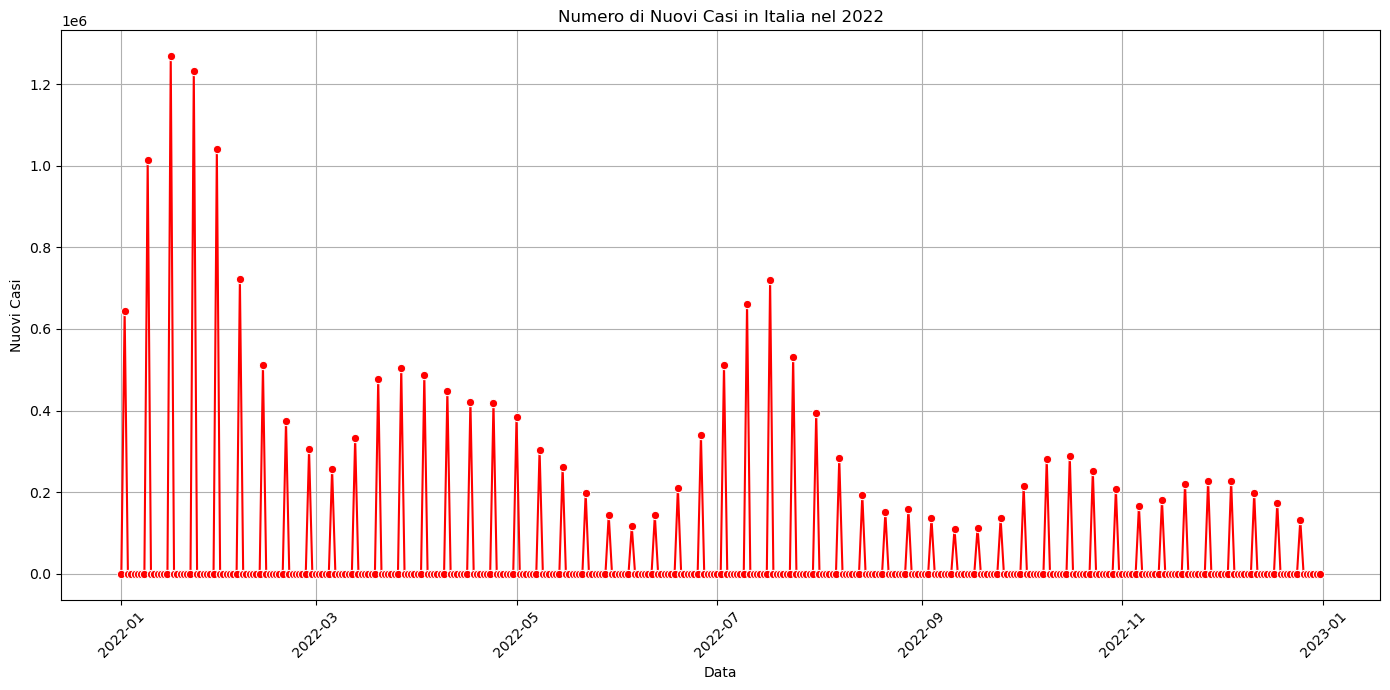

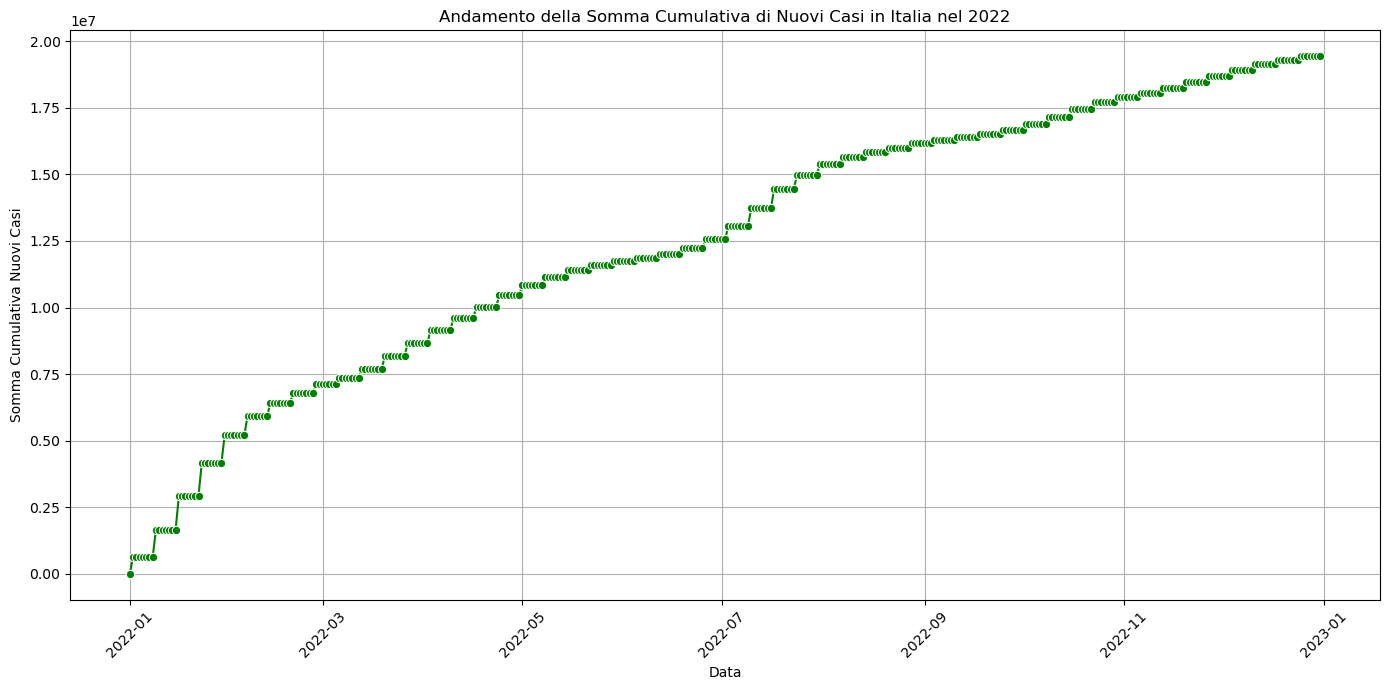

Osservazioni:
1. L'evoluzione dei casi totali mostra l'andamento complessivo dell'epidemia, che tende ad aumentare con il tempo.
2. Il numero di nuovi casi mostra le fluttuazioni giornaliere o settimanali, con picchi che possono essere correlati a vari fattori.) 
   I più significativi sono ad inizio anno (con il ciclo vaccinale non ancora concluso), probabilmente dovuuto allo stretto contatto durante il periodo natalizio 
   e quello ad agosto dovuto, probabilmente, alla fine delle restrizioni di emergenza anti-covid
3. La somma cumulativa dei nuovi casi segue un andamento crescente, simile ai casi totali, con pendenza meno pronunciata. Ciò ci conferma la veridicità dei dati raccolti


In [58]:
#4: Carico e pulisco i dati, li filtro per data e poi creo i vari grafici

covid['total_cases'] = pd.to_numeric(covid['total_cases'], errors='coerce')
covid['new_cases'] = pd.to_numeric(covid['new_cases'], errors='coerce')
covid['date'] = pd.to_datetime(covid['date'], errors='coerce')

italy_data_2022 = covid[(covid['location'] == 'Italy') & (covid['date'].dt.year == 2022)]

# copia del DataFrame per evitare avvisi
italy_data_2022_copy = italy_data_2022.copy()

italy_data_2022_copy['cumulative_new_cases'] = italy_data_2022_copy['new_cases'].cumsum()

# Grafico 1: Evoluzione dei casi totali nel 2022
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='total_cases', data=italy_data_2022, marker='o')
plt.title('Evoluzione dei Casi Totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grafico 2: Numero di nuovi casi nel 2022
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='new_cases', data=italy_data_2022, marker='o', color='red')
plt.title('Numero di Nuovi Casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grafico 3: Andamento della somma cumulativa di nuovi casi nel 2022
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='cumulative_new_cases', data=italy_data_2022_copy, marker='o', color='green')
plt.title('Andamento della Somma Cumulativa di Nuovi Casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Somma Cumulativa Nuovi Casi')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Commento
print("Osservazioni:")
print("1. L'evoluzione dei casi totali mostra l'andamento complessivo dell'epidemia, che tende ad aumentare con il tempo.")
print("2. Il numero di nuovi casi mostra le fluttuazioni giornaliere o settimanali, con picchi che possono essere correlati a vari fattori.) \n   I più significativi sono ad inizio anno (con il ciclo vaccinale non ancora concluso), probabilmente dovuuto allo stretto contatto durante il periodo natalizio \n   e quello ad agosto dovuto, probabilmente, alla fine delle restrizioni di emergenza anti-covid")
print("3. La somma cumulativa dei nuovi casi segue un andamento crescente, simile ai casi totali, con pendenza meno pronunciata. Ciò ci conferma la veridicità dei dati raccolti")

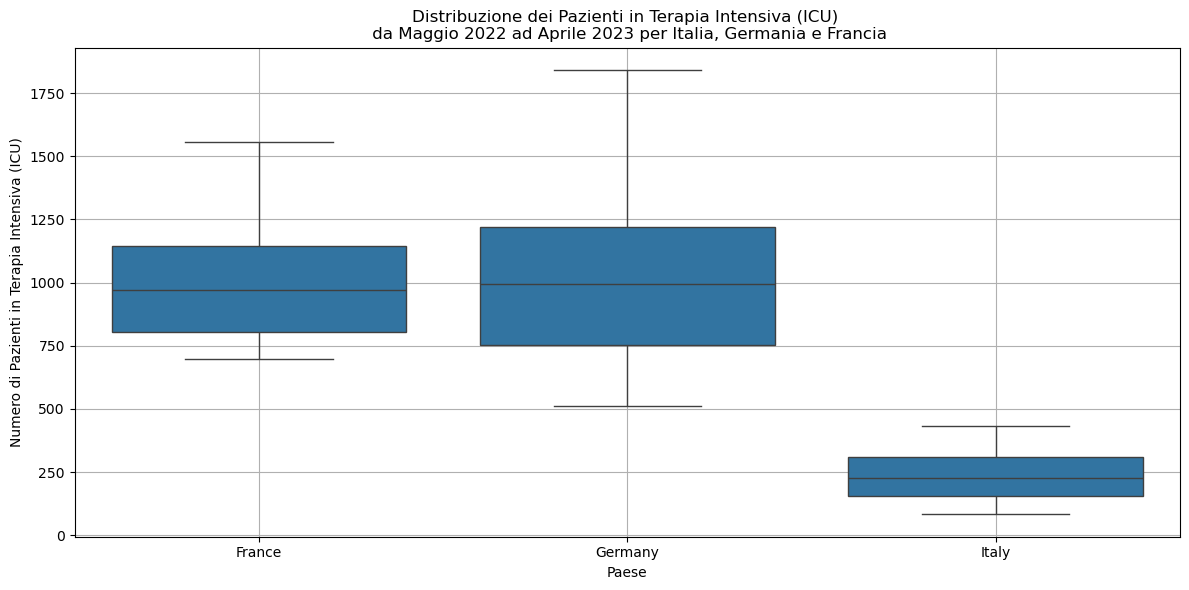

Osservazioni:
La Francia ha il numero medio di pazienti ICU più alta, però la distribuzione è abbastanza stretta, suggerendo una variazione limitata attorno al valore medio.
La Germania, invece, ha un numero medio leggermente più basso, ma resenta la maggiore variabilità tra i tre paesi, con un intervallo interquartile ampio e una mediana che si aggira
intorno ai 1000 pazienti. Questo indica che il numero di pazienti in ICU è stato molto variabile durante il periodo considerato.
L'Italia, infine, ha il numero più basso di pazienti in terapia intensiva rispetto a Francia e Germania. La mediana si trova intorno ai 400 pazienti,
con un intervallo interquartile stretto. Questo indica che la situazione in Italia è stata relativamente stabile con un numero contenuto di pazienti in terapia intensiva.


In [66]:
#5: pulisco e filtro i dati ed creo il boxplot
covid['icu_patients'] = pd.to_numeric(covid['icu_patients'], errors='coerce')
covid['date'] = pd.to_datetime(covid['date'], errors='coerce')

start_date = '2022-05-01'
end_date = '2023-04-30'
nations = ['Italy', 'Germany', 'France']

icu_data = covid[(covid['location'].isin(nations)) & 
                 (covid['date'] >= start_date) & 
                 (covid['date'] <= end_date)].copy()


icu_data.dropna(subset=['icu_patients'], inplace=True)

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='location', y='icu_patients', data=icu_data)
plt.title('Distribuzione dei Pazienti in Terapia Intensiva (ICU) \n da Maggio 2022 ad Aprile 2023 per Italia, Germania e Francia')
plt.xlabel('Paese')
plt.ylabel('Numero di Pazienti in Terapia Intensiva (ICU)')
plt.grid(True)
plt.tight_layout()
plt.show()

#Commento
print("Osservazioni:")
print("La Francia ha il numero medio di pazienti ICU più alta, però la distribuzione è abbastanza stretta, suggerendo una variazione limitata attorno al valore medio.")
print("La Germania, invece, ha un numero medio leggermente più basso, ma resenta la maggiore variabilità tra i tre paesi, con un intervallo interquartile ampio e una mediana che si aggira\nintorno ai 1000 pazienti. Questo indica che il numero di pazienti in ICU è stato molto variabile durante il periodo considerato.")
print("L'Italia, infine, ha il numero più basso di pazienti in terapia intensiva rispetto a Francia e Germania. La mediana si trova intorno ai 400 pazienti,\ncon un intervallo interquartile stretto. Questo indica che la situazione in Italia è stata relativamente stabile con un numero contenuto di pazienti in terapia intensiva.")

In [72]:
#6: filtro pulisco e creo copia, verifico presenza di dati nulli e li sostituisco
covid['hosp_patients'] = pd.to_numeric(covid['hosp_patients'], errors='coerce')
covid['date'] = pd.to_datetime(covid['date'], errors='coerce')

countries = ['Italy', 'Germany', 'France', 'Spain']
start_date = '2023-01-01'
end_date = '2023-12-31'


filtered_data = covid[
    (covid['location'].isin(countries)) &
    (covid['date'] >= start_date) &
    (covid['date'] <= end_date)
].copy()  


print("Verifica dei dati nulli:")
print(filtered_data[['location', 'hosp_patients']].isnull().sum())


filtered_data['hosp_patients'] = filtered_data['hosp_patients'].fillna(0)

# Calcolo la somma dei pazienti ospitalizzati per ogni paese
sum_hospitalized = filtered_data.groupby('location')['hosp_patients'].sum().reset_index()


print("\nSomma dei Pazienti Ospitalizzati nel 2023:")
print(sum_hospitalized)
#ho usato questo comando per vedere se i dati della germania fossero corretti dato che c'era una incongruenza tra gli ICU patitets e gli hosp patitens, sembrerebbe che tutti i dati degli hosp non siano stati tenuti in considerazione dall'inizio
#germany_data = covid[
#    (covid['location'] == 'Germany') &
#    (covid['date'] >= '2023-01-01') &
#    (covid['date'] <= '2023-12-31')
#]
#pd.set_option('display.max_rows', None)  
#pd.set_option('display.max_columns', None)  
#germany_data

# Commento sui dati nulli
print("\nCommento sui dati nulli:")
print("1. I dati nulli nella colonna 'hosp_patients' sono stati sostituiti con 0.")
print("2. La sostituzione con 0 può essere appropriata se i dati mancanti significano che non ci sono stati pazienti ospitalizzati per quei giorni specifici.")
print("3. I dati mancanti sono significativi e rappresentano una carenza di reportistica, potrebbe essere necessario un altro approccio per gestirli,\ncome l'imputazione basata su medie o mediana, o considerare i dati come mancanti se non si ha altra informazione.")

Verifica dei dati nulli:
location           0
hosp_patients    843
dtype: int64

Somma dei Pazienti Ospitalizzati nel 2023:
  location  hosp_patients
0   France     1382574.00
1  Germany           0.00
2    Italy     1175272.00
3    Spain      354602.00

Commento sui dati nulli:
1. I dati nulli nella colonna 'hosp_patients' sono stati sostituiti con 0.
2. La sostituzione con 0 può essere appropriata se i dati mancanti significano che non ci sono stati pazienti ospitalizzati per quei giorni specifici.
3. Se i dati mancanti sono significativi e rappresentano una carenza di reportistica, potrebbe essere necessario un altro approccio per gestirli,
come l'imputazione basata su medie o mediana, o considerare i dati come mancanti se non si ha altra informazione.
